Notebook for exploring the latent structure of the data reported in Chen et al.  

In this notebook we look at latent structure on a broad period-by-period basis.  By "broad period" we meen we group data points by the overall period they are in (e.g., phototaxis, omr) and do not look at finer granularity (e.g, left vs. right phototaxis)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

import sklearn.decomposition as decomposition

from ahrens_wbo.raw_data_processing import load_processed_data
from ahrens_wbo.annotations import label_periods
from ahrens_wbo.visualization import PERIOD_CLRS
from probabilistic_model_synthesis.fa import orthonormalize

In [3]:
%matplotlib notebook

## Parameters go here

In [4]:
ps = dict()
ps['data_dir'] = r'/groups/bishop/bishoplab/projects/ahrens_wbo/data'
ps['dataset'] = r'subject_10'
ps['n_components'] = 10

## Load the dataset

In [5]:
dataset = load_processed_data(Path(ps['data_dir']) / ps['dataset'], 11)

## Fit an FA model to the data

In [6]:
data = dataset.ts_data['dff']['vls'][:]

In [7]:
mdl = decomposition.FactorAnalysis(n_components=ps['n_components'])
mdl.fit(data)

FactorAnalysis(n_components=10)

In [8]:
latents = mdl.transform(data)
lm_o, latents_o = orthonormalize(mdl.components_.transpose(), latents)

## Visualize the latents

In [9]:
periods = label_periods(dataset.ts_data['stim']['vls'][:])

In [24]:
start_dim = 6

<IPython.core.display.Javascript object>


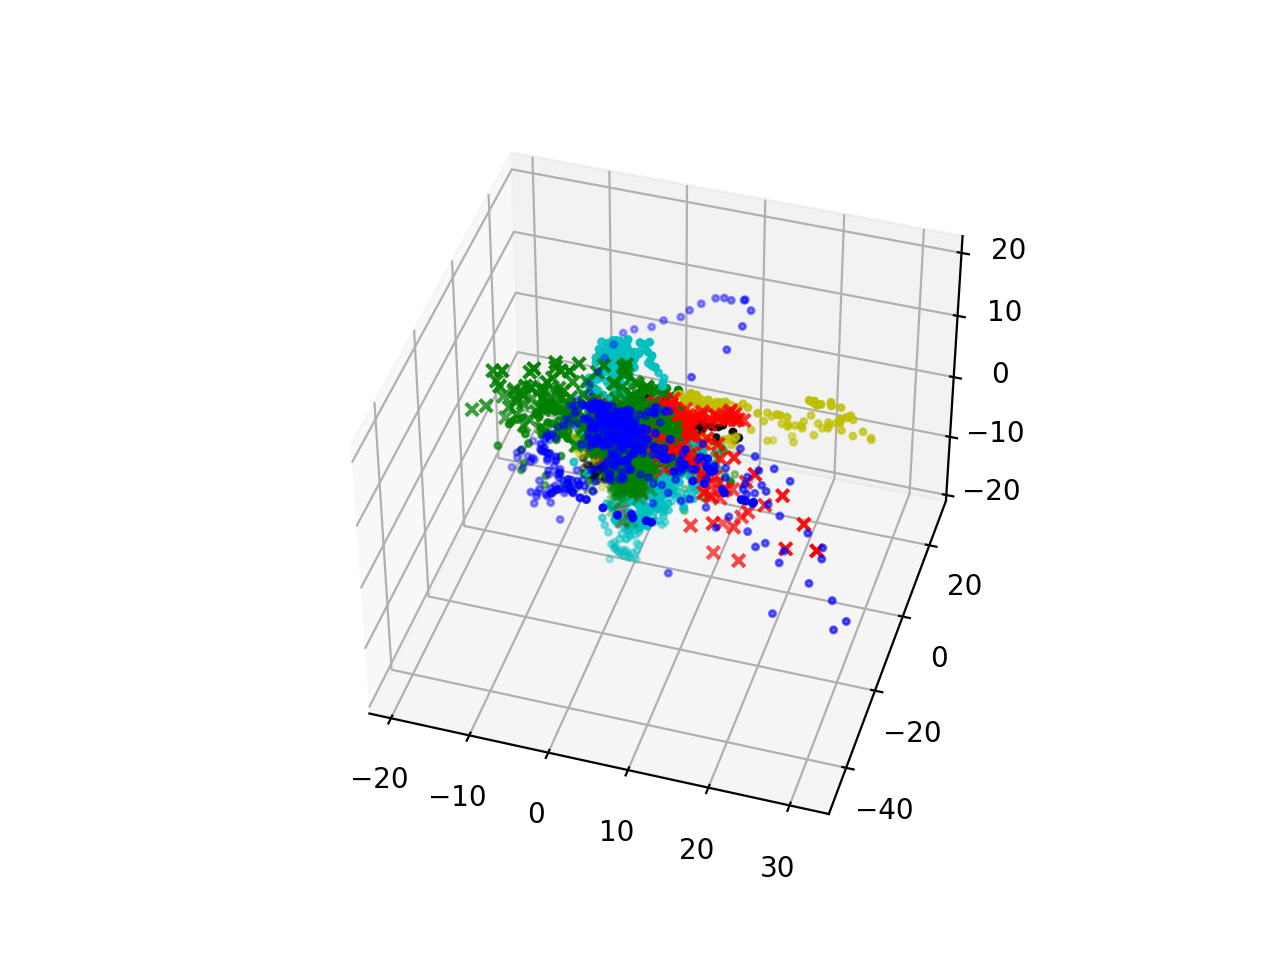

In [25]:
plt.figure()
ax = plt.axes(projection='3d')

for period, slices in periods.items():
    clr = PERIOD_CLRS[period]
    for sl in slices:
        if sl['shock'] == False:
            marker = '.'
        else:
            marker = 'x'
            
        inds = sl['slice']
        
        ax.scatter(latents_o[inds,start_dim+0], latents_o[inds,start_dim+1], latents_o[inds,start_dim+2], 
                   color=clr, marker=marker)
        plt.show()

In [11]:
PERIOD_CLRS

{'flash': 'm',
 'phototaxis': 'r',
 'omr': 'g',
 'looming': 'b',
 'spontaneous': 'y',
 'dot': 'k',
 'colors': 'c'}